In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


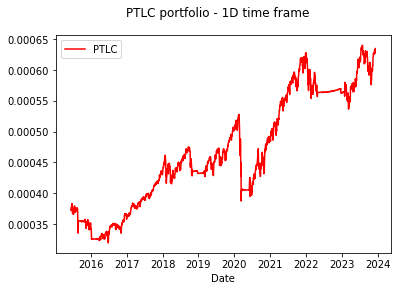

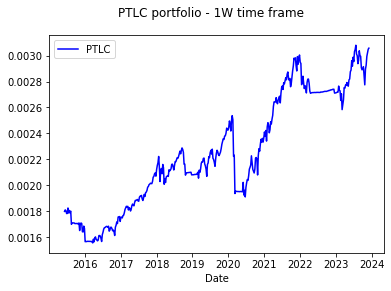

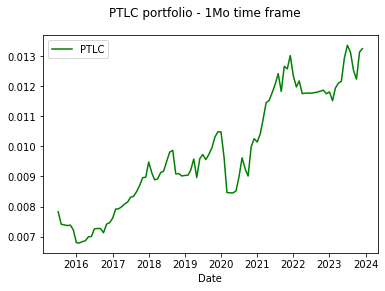

In [2]:
# Set the start and end dates for the data collection
start_date = '2022-09-01'  # ETF inception date
end_date = '2023-11-23'

# Download historical data for the ETF and its underlying assets
ptlc_data_1d = yf.download(tickers='PTLC', period = "max", interval = "1d")
ptlc_portfolio_holdings_1d = ptlc_data_1d["Close"]/(ptlc_data_1d["Close"]).sum()
ptlc_data_1w = yf.download(tickers='PTLC',period = "max", interval = "1wk")
ptlc_portfolio_holdings_1w = ptlc_data_1w["Close"]/ptlc_data_1w["Close"].sum()
ptlc_data_1mo = yf.download(tickers='PTLC', period = "max", interval = "1mo")
ptlc_portfolio_holdings_1mo = ptlc_data_1mo["Close"]/ptlc_data_1mo["Close"].sum()

# plot portfolio holdings of ticker in different time frame to choose best time frame:

plt.plot(ptlc_portfolio_holdings_1d, "r", label = "PTLC")
plt.xlabel("Date")
plt.suptitle("PTLC portfolio - 1D time frame")
plt.legend()
plt.show()

plt.plot(ptlc_portfolio_holdings_1w, "b", label = "PTLC")
plt.xlabel("Date")
plt.suptitle("PTLC portfolio - 1W time frame")
plt.legend()
plt.show()

plt.plot(ptlc_portfolio_holdings_1mo, "g", label = "PTLC")
plt.xlabel("Date")
plt.suptitle("PTLC portfolio - 1Mo time frame")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


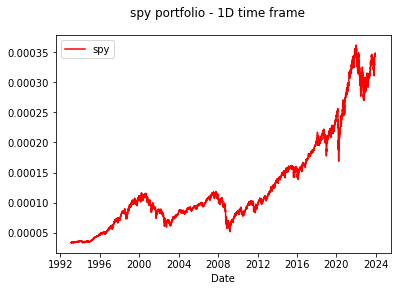

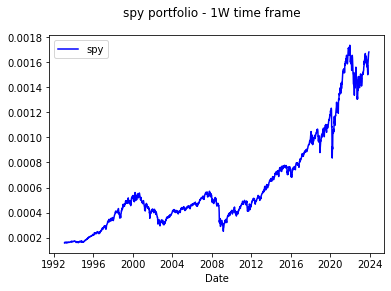

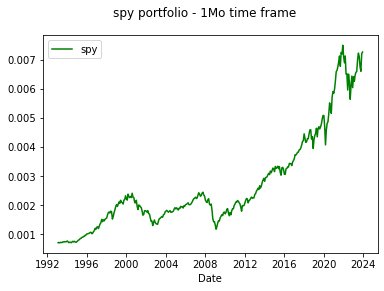

In [3]:
# Download historical data for the ETF and its underlying assets

spy_data_1d = yf.download(tickers='spy', period = "max", interval = "1d")
spy_portfolio_holdings_1d = spy_data_1d["Close"]/(spy_data_1d["Close"]).sum()
spy_data_1w = yf.download(tickers='spy', period = "max", interval = "1wk")
spy_portfolio_holdings_1w = spy_data_1w["Close"]/spy_data_1w["Close"].sum()
spy_data_1mo = yf.download(tickers='spy', period = "max", interval = "1mo")
spy_portfolio_holdings_1mo = spy_data_1mo["Close"]/spy_data_1mo["Close"].sum()

# plot portfolio holdings of ticker in different time frame to choose best time frame:

plt.plot(spy_portfolio_holdings_1d, "r", label = "spy")
plt.xlabel("Date")
plt.suptitle("spy portfolio - 1D time frame")
plt.legend()
plt.show()

plt.plot(spy_portfolio_holdings_1w, "b", label = "spy")
plt.xlabel("Date")
plt.suptitle("spy portfolio - 1W time frame")
plt.legend()
plt.show()

plt.plot(spy_portfolio_holdings_1mo, "g", label = "spy")
plt.xlabel("Date")
plt.suptitle("spy portfolio - 1Mo time frame")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


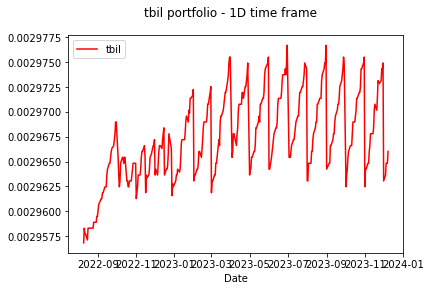

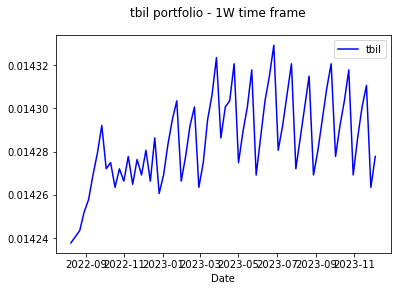

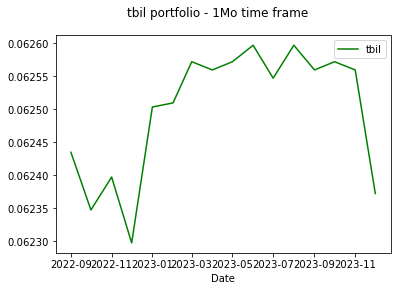

In [4]:
# Download historical data for the ETF and its underlying assets

tbil_data_1h = yf.download(tickers='tbil', period = "max", interval = "1h")
tbil_portfolio_holdings_1h = tbil_data_1h["Close"]/(tbil_data_1h["Close"]).sum()
tbil_data_1d = yf.download(tickers='tbil', period = "max", interval = "1d")
tbil_portfolio_holdings_1d = tbil_data_1d["Close"]/(tbil_data_1d["Close"]).sum()
tbil_data_1w = yf.download(tickers='tbil', period = "max", interval = "1wk")
tbil_portfolio_holdings_1w = tbil_data_1w["Close"]/tbil_data_1w["Close"].sum()
tbil_data_1mo = yf.download(tickers='tbil', period = "max", interval = "1mo")
tbil_portfolio_holdings_1mo = tbil_data_1mo["Close"]/tbil_data_1mo["Close"].sum()

# plot portfolio holdings of ticker in different time frame to choose best time frame:

plt.plot(tbil_portfolio_holdings_1d, "r", label = "tbil")
plt.xlabel("Date")
plt.suptitle("tbil portfolio - 1D time frame")
plt.legend()
plt.show()

plt.plot(tbil_portfolio_holdings_1w, "b", label = "tbil")
plt.xlabel("Date")
plt.suptitle("tbil portfolio - 1W time frame")
plt.legend()
plt.show()

plt.plot(tbil_portfolio_holdings_1mo, "g", label = "tbil")
plt.xlabel("Date")
plt.suptitle("tbil portfolio - 1Mo time frame")
plt.legend()
plt.show()

In [5]:
# Defining simulated return based on indicators

def Simulated_return(df):

    # Calculate the returns
    df["Returns"] = df["Adj Close"].pct_change()

    # Define the indicators
    equity_indicator = (df["Adj Close"] > df["Adj Close"].rolling(window=200).mean()) & (df["Adj Close"].shift(1) > df["Adj Close"].shift(1).rolling(window=200).mean()) & (df["Adj Close"].shift(2) > df["Adj Close"].shift(2).rolling(window=200).mean()) & (df["Adj Close"].shift(3) > df["Adj Close"].shift(3).rolling(window=200).mean()) & (df["Adj Close"].shift(4) > df["Adj Close"].shift(4).rolling(window=200).mean())

    fifty_fifty_indicator = (df["Adj Close"] < df["Adj Close"].rolling(window=200).mean()) & (df["Adj Close"].shift(1) < df["Adj Close"].shift(1).rolling(window=200).mean()) & (df["Adj Close"].shift(2) < df["Adj Close"].shift(2).rolling(window=200).mean()) & (df["Adj Close"].shift(3) < df["Adj Close"].shift(3).rolling(window=200).mean()) & (df["Adj Close"].shift(4) < df["Adj Close"].shift(4).rolling(window=200).mean())

    extreme_valuation_trigger = ((df["Adj Close"] > 1.2 * df["Adj Close"].rolling(window=200).mean()) | (df["Adj Close"] < 0.8 * df["Adj Close"].rolling(window=200).mean()))

    t_bill_indicator = (df["Adj Close"].shift(5).rolling(window=200).mean() > df["Adj Close"].rolling(window=200).mean())

    # Define the position
    position = pd.Series(index=df.index)

    # Set the initial position to equity
    position[:] = "Equity"

    # Apply the indicators
    position[equity_indicator] = "Equity"
    position[fifty_fifty_indicator] = "50/50"
    position[extreme_valuation_trigger] = "50/50"
    position[t_bill_indicator] = "T-Bill"

    # Calculate the simulated returns
    simulated_returns = pd.Series(index=df.index)

    simulated_returns[position == "Equity"] = df["Returns"][position == "Equity"]
    simulated_returns[position == "50/50"] = df["Returns"][position == "50/50"] * 0.5 + 0.5 * 0
    simulated_returns[position == "T-Bill"] = 0

    # Generate the time series of the ETF's returns
    # simulated_returns.plot()

    return simulated_returns, position


In [6]:
# Defining return of assets based on price

def Return(df):
    # Calculate the returns
    df["Returns"] = df["Adj Close"].pct_change()
    real_return = df["Returns"]
    
    return real_return

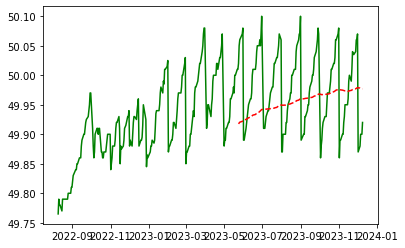

In [7]:
window_size = 200  # Replace with your desired window size

SMA_200 = tbil_data_1d['Close'].rolling(window_size).mean()
plt.plot(tbil_data_1d["Close"], 'g', SMA_200, "r--")
plt.show()


In [22]:
# Caomaring real return of PTLC and simulated return of Tbil and Spy:

print("Real return of PTLC : ", Return(ptlc_data_1mo).sum())
print("Simulated return of PTLC : ", Simulated_return(tbil_data_1mo)[0].sum() +  Simulated_return(spy_data_1mo)[0].sum())

# Because PTLC has lots of stocks in its portfolio, SPY and TBIl should have weight in our strategy

Real return of PTLC :  0.6561789212305948
Simulated return of PTLC :  2.2601777860722527


C:\Users\NiK\AppData\Local\Temp/ipykernel_10584/2145566904.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  position = pd.Series(index=df.index)
C:\Users\NiK\AppData\Local\Temp/ipykernel_10584/2145566904.py:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  simulated_returns = pd.Series(index=df.index)


In [25]:
# Calculating the best weight for estimation of return:

def Weight_portfolio(df1, df2, df3):
    
    simulated_return1 = Simulated_return(df2)[0].sum()
    simulated_return2 = Simulated_return(df3)[0].sum()
    
    real_return = Return(df1).sum()
    index = []
    return_difference = []
    for i in np.arange(0.01,1,0.01):
        for j in np.arange(0.01,1,0.01):
            return_difference.append(np.abs(real_return - (i * simulated_return1 + j * simulated_return2))) # abs()
            index.append((i,j))
    
    best_difference = min(return_difference)

    best_weight = [k for k, num in enumerate(return_difference) if num == best_difference]
    best_index = index[best_weight[0]]
    
    return f"The best weight of i is {best_index[0]} and the best weight of j is {best_index[1]}"
            
    

In [26]:
print(Weight_portfolio(ptlc_data_1mo, spy_data_1mo, tbil_data_1mo))

C:\Users\NiK\AppData\Local\Temp/ipykernel_10584/2145566904.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  position = pd.Series(index=df.index)
C:\Users\NiK\AppData\Local\Temp/ipykernel_10584/2145566904.py:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  simulated_returns = pd.Series(index=df.index)


The best weight of i is 0.28 and the best weight of j is 0.7000000000000001


In [28]:
# Comparing real return and simulated weighted return:

print(f"Real return of PTLC is {Return(ptlc_data_1mo).sum()}")
print(f"Simulated return of PTLC is {0.28 * Simulated_return(spy_data_1mo)[0].sum() + 0.7 * Simulated_return(tbil_data_1mo)[0].sum()}")
# They are so close

Real return of PTLC is 0.6561789212305948
Simulated return of PTLC is 0.6562240277127613


C:\Users\NiK\AppData\Local\Temp/ipykernel_10584/2145566904.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  position = pd.Series(index=df.index)
C:\Users\NiK\AppData\Local\Temp/ipykernel_10584/2145566904.py:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  simulated_returns = pd.Series(index=df.index)


In [ ]:
# Analysing performance of indicators:
# Buying means after signal of buy position, next price gets grater value than SMA(200)
# Selling means after signal of sell position, next price gets less value than SMA(200)

number_of_false_signal = 0
i = 0
while i<= len(Simulated_return(ptlc_data_1d)[1]) - 2:

    if Simulated_return(ptlc_data_1d)[1][i] != Simulated_return(ptlc_data_1d)[1][i+1] != Simulated_return(ptlc_data_1d)[1][i+2]:
        number_of_false_signal += 1

    i += 1


print(f"Number of wrong signal is {number_of_false_signal}")

C:\Users\NiK\AppData\Local\Temp/ipykernel_10584/2145566904.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  position = pd.Series(index=df.index)
C:\Users\NiK\AppData\Local\Temp/ipykernel_10584/2145566904.py:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  simulated_returns = pd.Series(index=df.index)
